In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt


In [4]:
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [5]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

In [6]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define hyperparameters
batch_size = 64
latent_dim = 100
img_shape = 28 * 28  # MNIST images are 28x28

# Initialize models, optimizers, loss function
generator = Generator(latent_dim, img_shape)
discriminator = Discriminator(img_shape)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
criterion = nn.BCELoss()

# Training data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        batch_size = real_imgs.shape[0]

        # Adversarial ground truth
        valid = torch.ones(batch_size, 1)
        fake = torch.zeros(batch_size, 1)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs.view(batch_size, -1)), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = 0.5 * (real_loss + fake_loss)
        d_loss.backward()
        optimizer_D.step()

        if i % 100 == 0:
            print(f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

100%|██████████| 9912422/9912422 [00:00<00:00, 108665408.38it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25556053.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23542418.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12977199.43it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[Epoch 0/30] [Batch 0/938] [D loss: 0.689515233039856] [G loss: 0.6831531524658203]
[Epoch 0/30] [Batch 100/938] [D loss: 0.36551862955093384] [G loss: 1.1882624626159668]
[Epoch 0/30] [Batch 200/938] [D loss: 0.7478223443031311] [G loss: 0.33770737051963806]
[Epoch 0/30] [Batch 300/938] [D loss: 0.117916040122509] [G loss: 1.5877041816711426]
[Epoch 0/30] [Batch 400/938] [D loss: 0.16526028513908386] [G loss: 1.6911590099334717]
[Epoch 0/30] [Batch 500/938] [D loss: 0.12926876544952393] [G loss: 2.1244630813598633]
[Epoch 0/30] [Batch 600/938] [D loss: 0.19246146082878113] [G loss: 1.8127155303955078]
[Epoch 0/30] [Batch 700/938] [D loss: 0.308993935585022] [G loss: 1.2186530828475952]
[Epoch 0/30] [Batch 800/938] [D loss: 0.3369433879852295] [G loss: 4.106566905975342]
[Epoch 0/30] [Batch 900/938] [D loss: 0.13880303502082825] [G loss: 2.0790674686431885]
[Epoch 1/30] [Batch 0/938] [D loss: 0.07567887753248215

[Epoch 0/30] [Batch 0/938] [D loss: 0.6662779450416565] [G loss: 0.8354014754295349]
[Epoch 0/30] [Batch 100/938] [D loss: 0.5613803863525391] [G loss: 0.9464554786682129]
[Epoch 0/30] [Batch 200/938] [D loss: 0.6173337697982788] [G loss: 0.8962214589118958]
[Epoch 0/30] [Batch 300/938] [D loss: 0.6543864011764526] [G loss: 0.971621036529541]
[Epoch 0/30] [Batch 400/938] [D loss: 0.531844973564148] [G loss: 1.1720733642578125]
[Epoch 0/30] [Batch 500/938] [D loss: 0.6914582252502441] [G loss: 0.8729146718978882]
[Epoch 0/30] [Batch 600/938] [D loss: 0.6150311231613159] [G loss: 1.0934597253799438]
[Epoch 0/30] [Batch 700/938] [D loss: 0.6313616037368774] [G loss: 1.1885651350021362]
[Epoch 0/30] [Batch 800/938] [D loss: 0.6179990768432617] [G loss: 0.9022079706192017]
[Epoch 0/30] [Batch 900/938] [D loss: 0.5430111885070801] [G loss: 1.0132590532302856]
[Epoch 1/30] [Batch 0/938] [D loss: 0.5692618489265442] [G loss: 0.9234488010406494]
[Epoch 1/30] [Batch 100/938] [D loss: 0.520790398

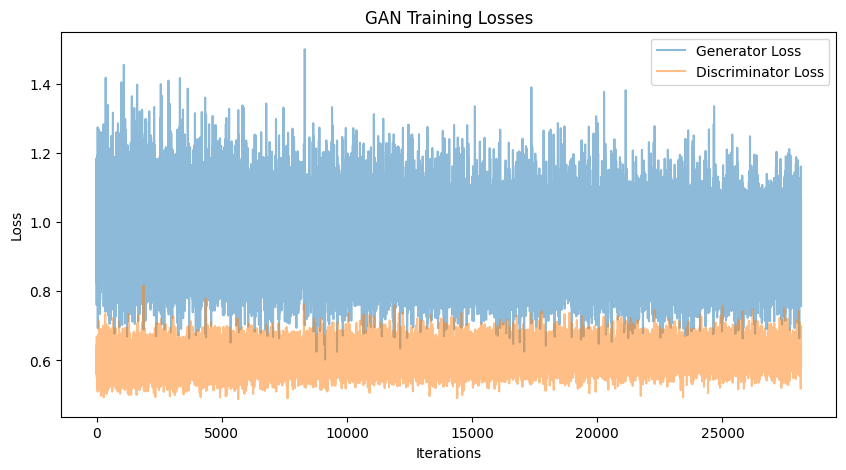

In [11]:
g_losses = []
d_losses = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        batch_size = real_imgs.shape[0]

        # Adversarial ground truth
        valid = torch.ones(batch_size, 1)
        fake = torch.zeros(batch_size, 1)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim)
        gen_imgs = generator(z)
        g_loss = criterion(discriminator(gen_imgs), valid)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_imgs.view(batch_size, -1)), valid)
        fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
        d_loss = 0.5 * (real_loss + fake_loss)
        d_loss.backward()
        optimizer_D.step()

        # Store losses for plotting
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

        if i % 100 == 0:
            print(f"[Epoch {epoch}/{num_epochs}] [Batch {i}/{len(dataloader)}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label="Generator Loss", alpha=0.5)
plt.plot(d_losses, label="Discriminator Loss", alpha=0.5)
plt.title("GAN Training Losses")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

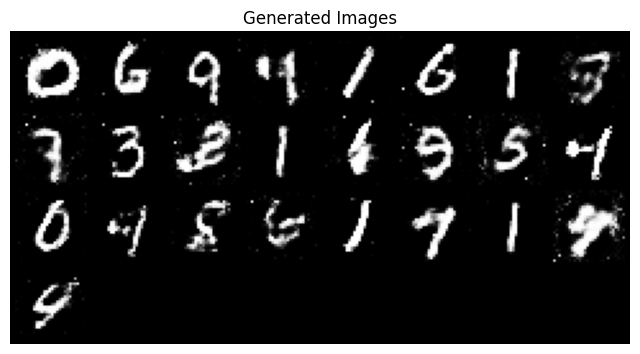

In [8]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Set the generator in evaluation mode
generator.eval()

# Generate some random noise
num_samples = 25
z = torch.randn(num_samples, latent_dim)

# Generate fake images using the generator
with torch.no_grad():
    fake_imgs = generator(z)

# Reshape the generated images
fake_imgs = fake_imgs.view(num_samples, 1, 28, 28)

# Denormalize the generated images to bring them to the original scale
fake_imgs = (fake_imgs + 1) / 2.0

# Plot the generated images
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(vutils.make_grid(fake_imgs, padding=2, normalize=True), (1, 2, 0)))
plt.show()